This is a Binary Classification problem with a clean dataset. We have to predict Yes/No (0/1) depending on the input features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [3]:
dataset = r"C:\Users\arnas\Desktop\Beginner\Task_1\Dataset\Task01.csv"
print(f"Dataset is loaded at{dataset}")

df = pd.read_csv(dataset)
print(df.head())
print("\n")
print(df.info())


Dataset is loaded atC:\Users\arnas\Desktop\Beginner\Task_1\Dataset\Task01.csv
   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No       

Data appears clean but still doing the basic EDA and Student ID is not required for the model to predict or else model will cheat on that hence removing studentID

In [4]:
if 'StudentID' in df.columns:
    df = df.drop(columns=['StudentID'])
print(df.isnull().sum())
print(df.shape)
print(df['PlacementStatus'].unique())

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64
(10000, 11)
['NotPlaced' 'Placed']


There is no NULL values anywhere and Dataset is clean and unique. Now we plot the graphs or correlation values for analysis

C:\Users\arnas\AppData\Local\Temp\ipykernel_2956\1305917705.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='PlacementStatus', data=df, palette='viridis')


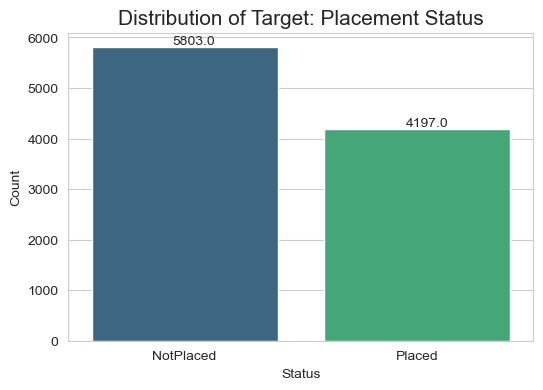

In [5]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(12,6)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='PlacementStatus', data=df, palette='viridis')
plt.title('Distribution of Target: Placement Status', fontsize=15)
plt.xlabel('Status')
plt.ylabel('Count')
# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 50))
plt.show()

The plot shows that the dataset is well balanced..There is no requirement of SMOTE analysis

C:\Users\arnas\AppData\Local\Temp\ipykernel_2956\538971034.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PlacementStatus', y=col, data=df, palette='Set2')
C:\Users\arnas\AppData\Local\Temp\ipykernel_2956\538971034.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PlacementStatus', y=col, data=df, palette='Set2')
C:\Users\arnas\AppData\Local\Temp\ipykernel_2956\538971034.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PlacementStatus', y=col, data=df, palette='Set2')
C:\Users\arnas\AppData\Local\Temp\ipykernel_2956\538971

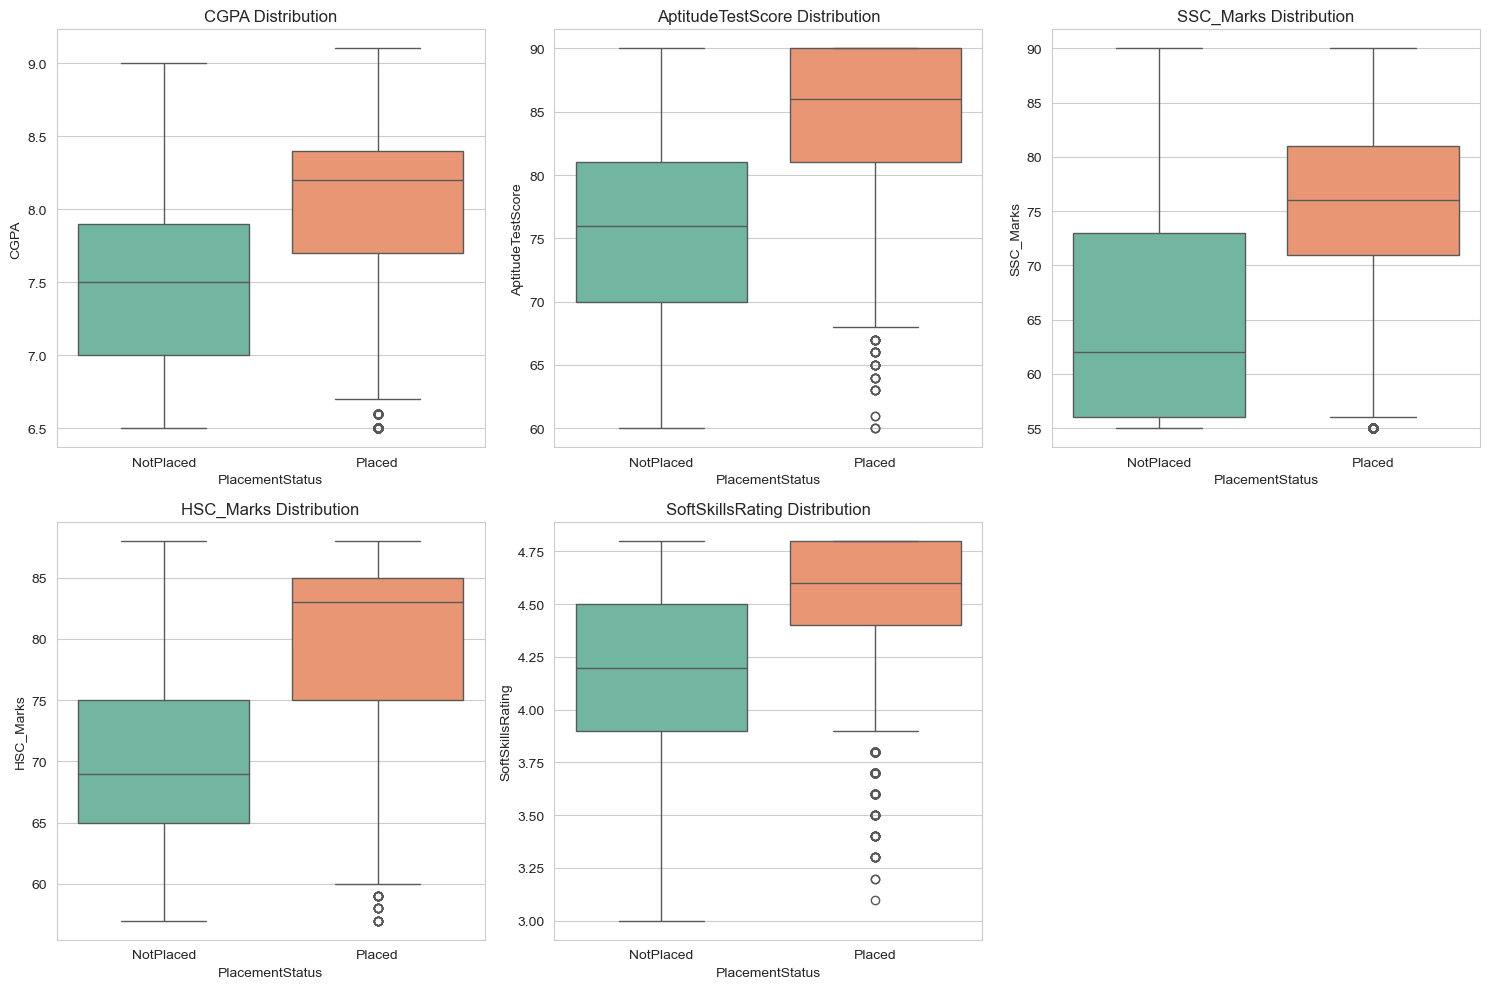

In [6]:
numerical_features = ['CGPA', 'AptitudeTestScore', 'SSC_Marks', 'HSC_Marks', 'SoftSkillsRating']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='PlacementStatus', y=col, data=df, palette='Set2')
    plt.title(f'{col} Distribution', fontsize=12)
plt.tight_layout()
plt.show()

Well the above analysis hels how the features affects this..Higher Aptitude Test score is important for placements. CGPA and other marks affect it too but grade alone doesnt gaurantee a job and if the SSC marks are too low then there is a high possibility of not getting placed. This is the analysis of the numerical features in the dataset

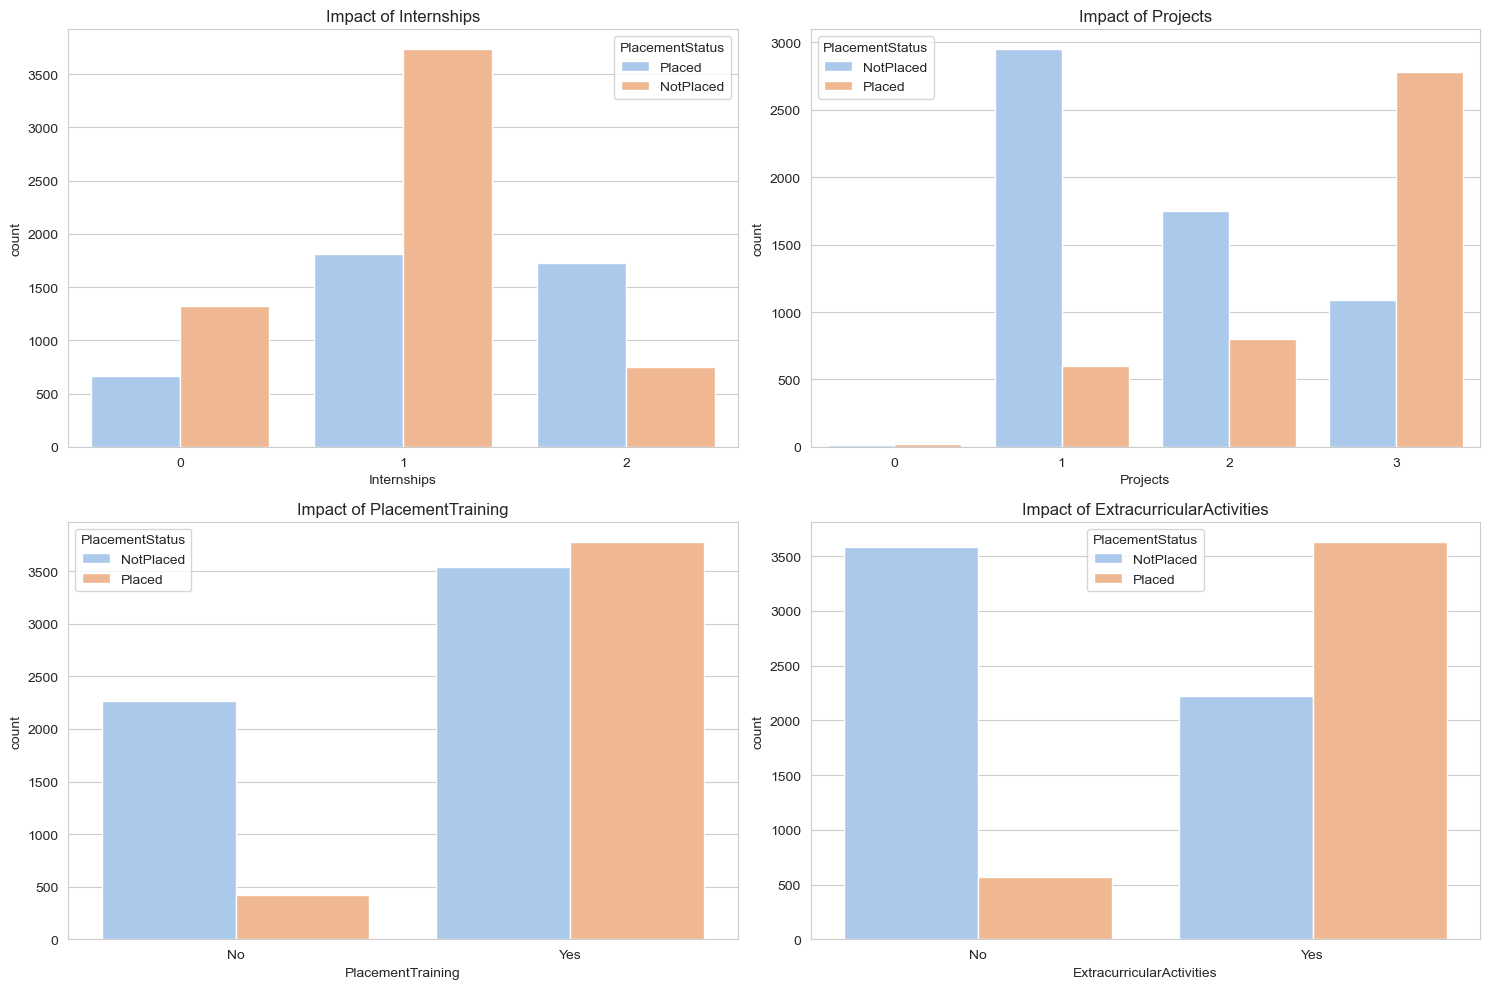

In [7]:
categorical_features = ['Internships', 'Projects', 'PlacementTraining', 'ExtracurricularActivities']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='PlacementStatus', data=df, palette='pastel')
    plt.title(f'Impact of {col}', fontsize=12)
plt.tight_layout()
plt.show()

Well the categorical features have another story to speak..Placement training enough doesnt garuntee a placement..Extracurricular activities are important..more projects affect the tally and internships too gives a fair edge. Analysing the Heatmap or correlation matrix

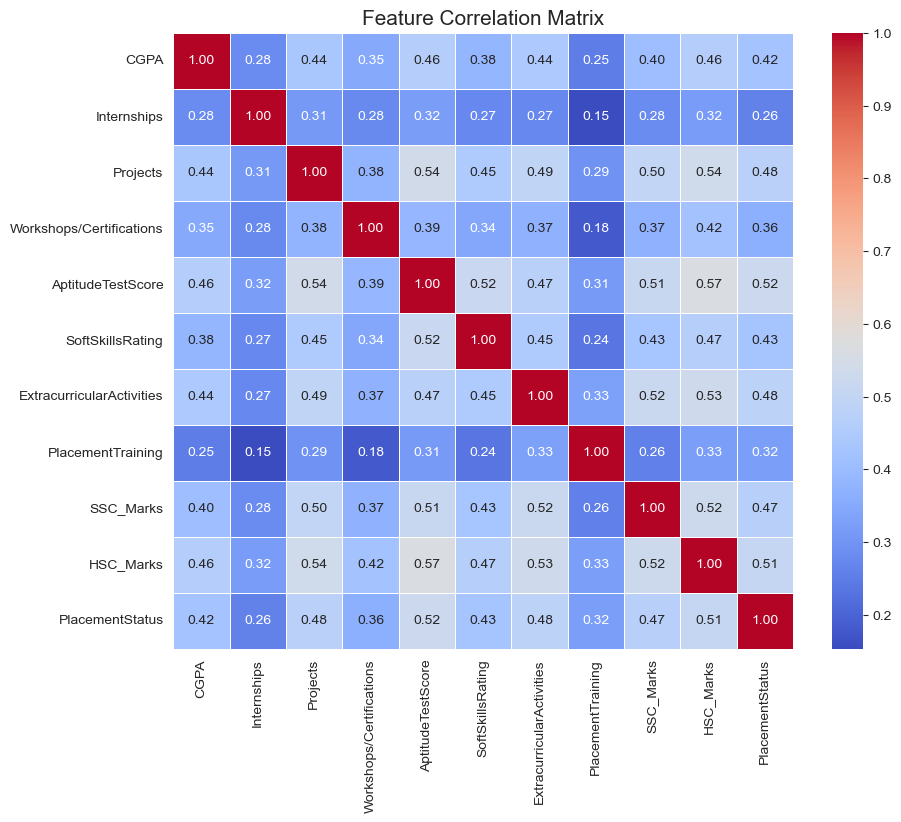

In [8]:
df_corr = df.copy()
le = LabelEncoder()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = le.fit_transform(df_corr[col])

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=15)
plt.show()

In [9]:


print("\n--- FINAL ANALYSIS: Top Predictors ---")
print(df_corr.corr()['PlacementStatus'].sort_values(ascending=False))


--- FINAL ANALYSIS: Top Predictors ---
PlacementStatus              1.000000
AptitudeTestScore            0.521744
HSC_Marks                    0.505746
ExtracurricularActivities    0.482491
Projects                     0.475186
SSC_Marks                    0.469763
SoftSkillsRating             0.427284
CGPA                         0.423131
Workshops/Certifications     0.362268
PlacementTraining            0.323659
Internships                  0.260340
Name: PlacementStatus, dtype: float64


CONCLUSIONS AFTER DATA ANALYSIS:

->The Aptitude Filter: The strongest correlation (0.52) comes from the AptitudeTestScore. This suggests the first round of interviews is the biggest hurdle. If you fail the    aptitude test, your CGPA doesn't matter.

->The "Consistency" Factor: Surprisingly, HSC_Marks (12th grade) correlate (0.50) more strongly than college CGPA (0.42). This might indicate companies look for long-term academic consistency.

->Soft Skills Matter: With a correlation of 0.42, SoftSkillsRating is as important as your CGPA.

->Training Works: The PlacementTraining feature shows a positive impact. The countplot confirms that the ratio of Placed/NotPlaced is much better for those who took the training.

In [10]:
#some features are text they have to be numbers for the model to predict hence doing label encoding.
le = LabelEncoder()
df['PlacementStatus'] = le.fit_transform(df['PlacementStatus'])
print("Target Encoding:", dict(zip(le.classes_, le.transform(le.classes_))))
binary_map = {'Yes':1 , 'No': 2}
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map(binary_map)
df['PlacementTraining'] = df['PlacementTraining'].map(binary_map)


Target Encoding: {'NotPlaced': np.int64(0), 'Placed': np.int64(1)}


Split Data 80 % training and 20 % testing

In [11]:
X = df.drop(columns=['PlacementStatus'])
y = df['PlacementStatus']
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [12]:
#Applying standard scaler as some values are not of the same range
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)
print(f"Training Data Shape: {X_train_scaled.shape}")
print(f"Testing Data Shape: {X_test_scaled.shape}")

Training Data Shape: (8000, 10)
Testing Data Shape: (2000, 10)


Now lets analyze models we begin with LogisticRegression then we try RandomForestClassifier and finally Support Vector Machine(SVM)

In [13]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test,y_pred) 
print(f"Accuracy of Logistic Regression model is :{acc*100:.2f}%")

Accuracy of Logistic Regression model is :79.50%


The simple Logistic Regression model is giving an accuracy of 79.5% which is reasonable and the model is not cheating

In [14]:
#Random Forest Classifier for tree based definition
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=42) # we are not including any hyperparameter tuning as the class imabalnce is absent and we already got good result
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test,y_pred) 
print(f"Accuracy of Random Forest Classifier model is :{acc*100:.2f}%")

Accuracy of Random Forest Classifier model is :78.55%


Random Forest Classifier gave as a result of 78.5% less than the basic model.

In [15]:
# Trying Support Vector Machine
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test,y_pred) 
print(f"Accuracy of Support Vector Machine is :{acc*100:.2f}%")

Accuracy of Support Vector Machine is :79.55%


The SVM is giving slight advantage here than Linear Regression model so we choose the SVM as our final model

In [16]:
from sklearn.metrics import classification_report

print("Classification Report of SVM:")
print(f"\n--- Detailed Report for {model} ---")
print(classification_report(y_test, model.predict(X_test_scaled)))

Classification Report of SVM:

--- Detailed Report for SVC(kernel='linear') ---
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1172
           1       0.74      0.77      0.76       828

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000



Hence this code executes all the necessary process required including cleaning dataset , evaluvating it via EDA , feature selection , doing the encodings , testing different models and evaluvating them. The support Vector Machine is the best model.

Done by Arvind K N
As a part of GDSC AI/ML Inductions